Chatbot using Langgraph == > LLM powered

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]
    

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")


In [8]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model_name="chatgpt-4o-latest")
llm.invoke("Hello")

AIMessage(content='Hello! How can I help you today? 😊', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'chatgpt-4o-latest', 'system_fingerprint': 'fp_89d721b155', 'id': 'chatcmpl-CZSndjOyBaT2vUtzuiddl8r1p1kz9', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--41ee71ac-41b8-4bb6-922c-5d099ac79a9d-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
from langchain_groq import ChatGroq

llm_groq = ChatGroq(model_name="qwen/qwen3-32b")
llm_groq.invoke("Hey I am Soumen, and I like to play cricket")

AIMessage(content="<think>\nOkay, the user is Soumen and he likes to play cricket. Let me start by acknowledging his introduction and expressing enthusiasm about his interest in cricket. I should ask him some follow-up questions to keep the conversation going. Maybe ask about his favorite team, position, or any memorable experiences he's had playing cricket. I want to make sure the questions are open-ended so he can elaborate. Also, I should keep the tone friendly and encouraging. Let me check if there's anything else I need to consider. Oh, maybe mention that cricket is a great sport to play and connect on that. Alright, time to put it all together in a natural, conversational way without any markdown.\n</think>\n\nHey Soumen! Nice to meet you 😊 Cricket is an awesome sport to play – I'd love to hear more about your passion for it! Do you play any specific position? Have you ever played for a local team or just for fun with friends? The best part about cricket is how it brings people t

In [11]:
## we aill start with creatinh node
def superbot(state:State):
    return {"messages":llm_groq.invoke(state["messages"])}

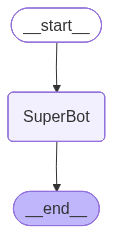

In [13]:
graph=StateGraph(State)
## node
graph.add_node("SuperBot",superbot)
## edges
graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)

graph_builder=graph.compile()

from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [16]:
## Invocation
graph_builder.invoke({"messages":["Hi, My name is Soumen, and I like cricket"]})

{'messages': [HumanMessage(content='Hi, My name is Soumen, and I like cricket', additional_kwargs={}, response_metadata={}, id='645a5093-7d0b-4e6b-9dee-d64a19034548'),
  AIMessage(content='<think>\nOkay, the user introduced himself as Soumen and mentioned he likes cricket. Let me start by greeting him and acknowledging his interest. I should ask a follow-up question to keep the conversation going. Maybe ask what he likes most about cricket or if he follows any particular teams or players. That way, I can engage him further and find out more about his interests. I need to keep the response friendly and open-ended to encourage him to share more. Also, making sure the tone is positive and enthusiastic about cricket to match his interest.\n</think>\n\nHello Soumen! Nice to meet you. Cricket is an amazing sport with so much strategy and excitement. What aspect of cricket do you enjoy the most? Is it following specific teams, players, or the game dynamics? 🏏', additional_kwargs={}, response_

## streaming the responses

In [22]:
for event in graph_builder.stream({"messages":["Hi, My name is Soumen"]}):
    print(event)

{'SuperBot': {'messages': AIMessage(content='<think>\nOkay, the user introduced themselves as Soumen. I need to respond politely and ask how I can help. I should keep it friendly and open-ended. Let me make sure to acknowledge their name and offer assistance. Maybe something like, "Hi Soumen! How can I assist you today?" That sounds good. I\'ll check for any typos and ensure the tone is welcoming.\n</think>\n\nHi Soumen! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 15, 'total_tokens': 108, 'completion_time': 0.186525347, 'prompt_time': 0.000738958, 'queue_time': 0.057840422, 'total_time': 0.187264305}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--9cd01018-ffe7-4248-b02f-a142772b2b64-0', usage_metadata={'input_tokens': 15, 'output_tokens': 93, 'total_tokens': 108})}}
